# Transforming Review Data into Features

The dataset we are woking in this notebook is Women's E-Commerce Clothing Reviews dataset. 

#### About Dataset

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:
* **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed
* **Age**: Postive Integer variable of the reviewers age. 
* **Review Text**: String variable for the review body. 
* **Rating**: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
* **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
* **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
* **Division Name**: Categorical name of the product high level division.
* **Department Name**: Categorical name of the product department name.
* **Class Name**: Categorical name of the product class name.

You can find more information about the dataset [here](https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews).

Let's start exploring the dataset first. 

In [36]:
# imports
import pandas as pd # data manipulation 
import matplotlib.pyplot as plt # normal visualization
import seaborn as sns # advance data visualization
import warnings
warnings.filterwarnings('ignore')

In [3]:
# let's see what is here
!ls /kaggle/input

womens-ecommerce-clothing-reviews


In [4]:
# load the data
reviews_df = pd.read_csv("/kaggle/input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")

In [5]:
# let's print the head of data
reviews_df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Let's see more information about the dataset. 

In [6]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


Let's see pairplot of whole dataset

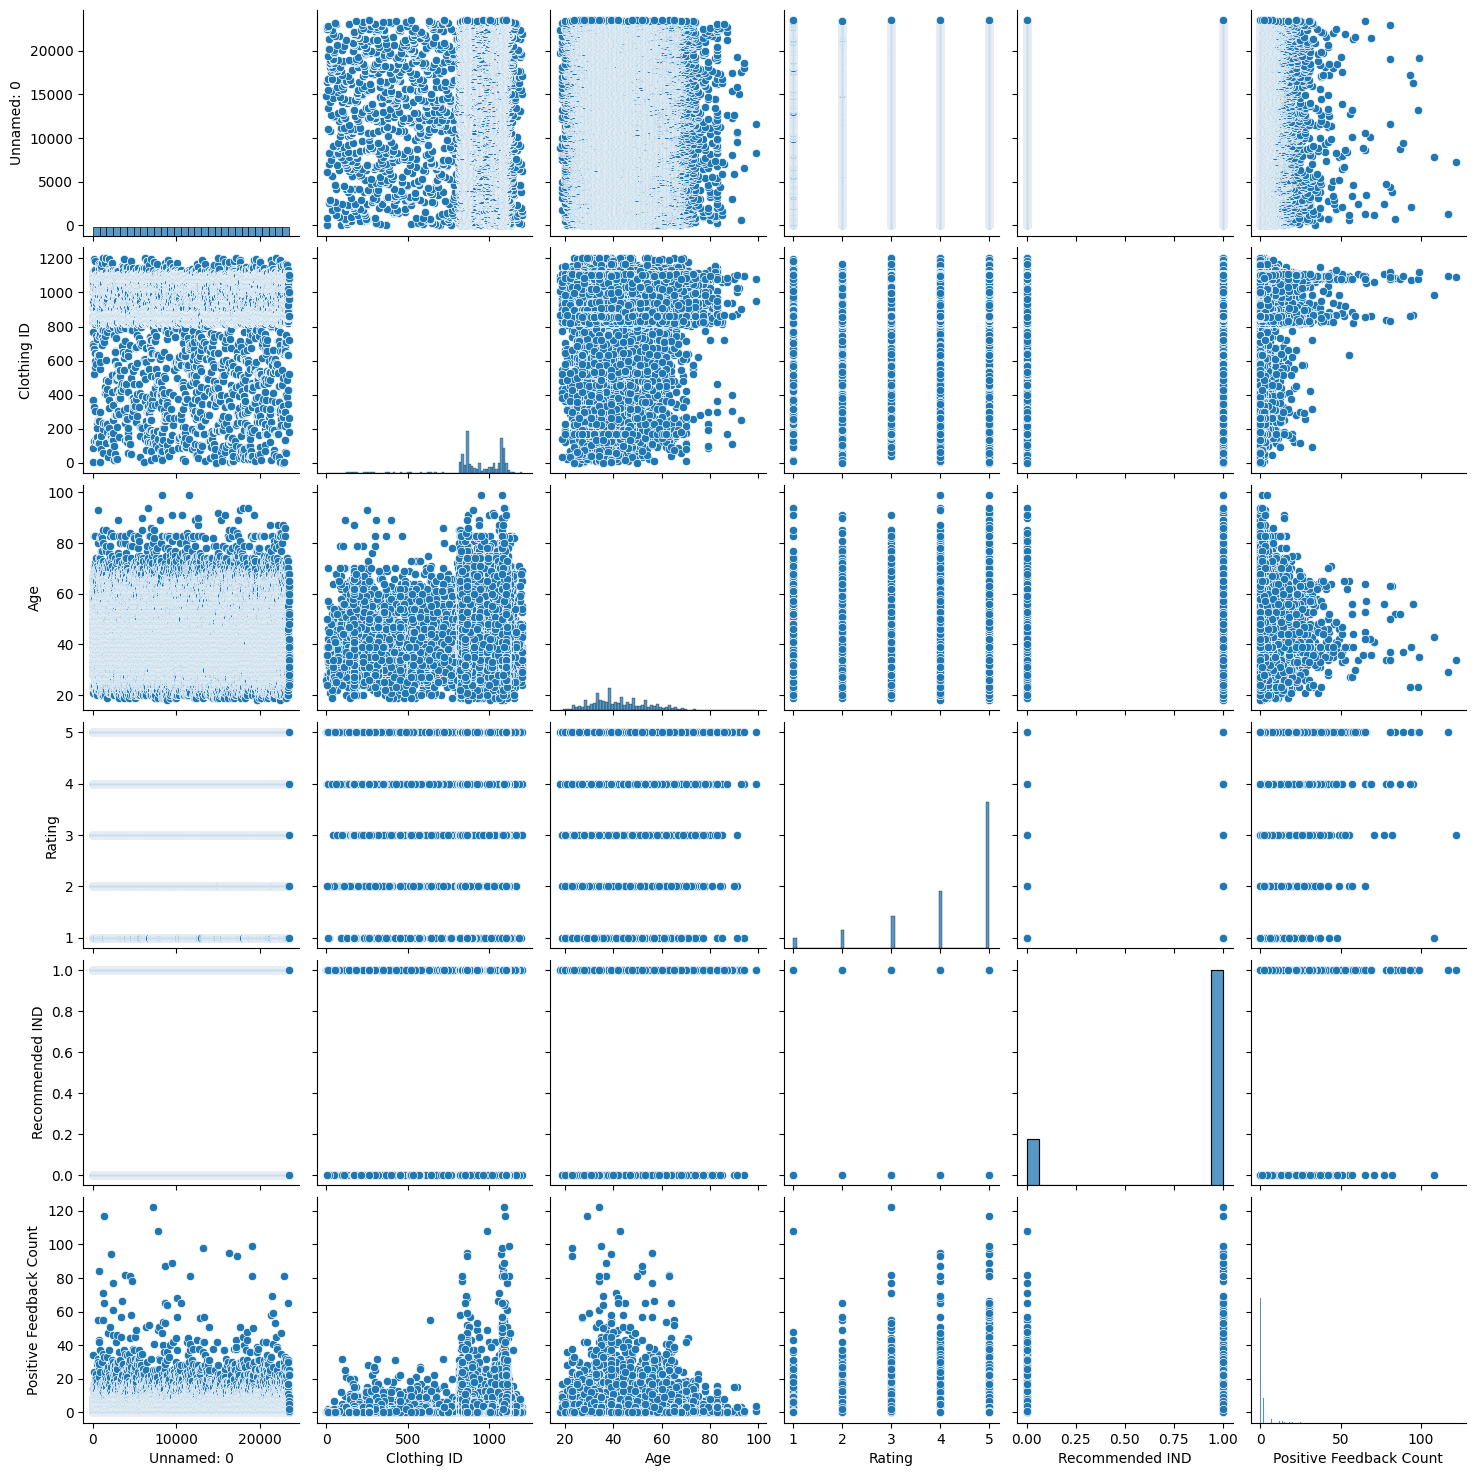

In [8]:
sns.pairplot(reviews_df)

If you closely look above different plot, you will get some insights about the data. 

In [9]:
# all columns
reviews_df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [10]:
reviews_df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

Cool! Looks good.


### Possible Predictive Modeling Approaches

Given the data, here are some ideas for predictive modeling:

1. **Predicting Recommendation**:
   - You could build a model to predict whether a customer will recommend a product (`Recommended IND`) based on the review text, rating, age, and other features.

2. **Sentiment Analysis**:
   - Perform sentiment analysis on the review text and build a model to predict the sentiment (positive, neutral, negative) based on the content of the reviews.

3. **Predicting Rating**:
   - Another approach could be to predict the rating (`Rating`) based on the review text and other features.

### Predict Recommendation

**In this notebook we are going to build Model which predict whether a customer will recommend a product `Recommended IND` based on the review text, rating, age, and other features.**



### Steps to Build a Machine Learning Model

1. **Data Preprocessing**:
   - Clean the data: Handle missing values, remove duplicates, and standardize the text data.
   - Feature Engineering: Transform textual data (e.g., `Review Text`) into features using techniques like TF-IDF or word embeddings.
   - Encode categorical variables if needed.

2. **Exploratory Data Analysis (EDA)**:
   - Analyze the distribution of the target variable and features.
   - Check for correlations and relationships between variables.

3. **Model Selection**:
   - Choose a machine learning model: For example, logistic regression, decision trees, or more complex models like Random Forest, Gradient Boosting, or Neural Networks.

4. **Training and Evaluation**:
   - Split the data into training and testing sets.
   - Train the model on the training set and evaluate it on the test set using appropriate metrics (e.g., accuracy, F1-score, ROC-AUC for classification tasks).

5. **Hyperparameter Tuning**:
   - Use techniques like Grid Search or Random Search to find the best hyperparameters for your model.

6. **Model Interpretation**:
   - Interpret the results, understand the most influential features, and refine the model as needed.

**Cool!! Let's start with data preprocessing.**

Great! Let's start by performing some basic data preprocessing steps. Here's what we'll do:

1. **Handle Missing Values:** Identify and handle missing values in the dataset.
2. **Text Preprocessing:** Clean the text data in the Review Text and Title columns.
3. **Categorical Variable Encoding:** Encode categorical variables into numerical ones.
4. **Feature Selection:** Decide on which features to include for the model.

Let's begin with handling missing values and examining the text data. I'll start by checking the dataset for any missing values and then we can proceed to clean and preprocess the text data.

In [12]:
# Checking for missing values in the dataset
missing_values = reviews_df.isnull().sum()

# Displaying columns with missing values
missing_values[missing_values > 0]


Title              3810
Review Text         845
Division Name        14
Department Name      14
Class Name           14
dtype: int64

### Handling Missing Values
Here are some strategies we can use to handle these missing values:

1. **Title**: Since the `Title` is often a brief summary of the `Review Text`, and there are a significant number of missing values, we might consider dropping this column if it's not critical to the analysis. Alternatively, we can fill in missing values with a placeholder like "No Title".

2. **Review Text**: This is a critical feature, so we should either drop rows with missing `Review Text` or fill them with a placeholder like "No Review" if we want to retain the other information.

3. **Division Name, Department Name, Class Name**: These categorical features have only a few missing values. We can fill these missing values with a placeholder such as "Unknown" or drop the rows if they are not numerous.

Let's proceed with these steps:

* Drop the `Title` column.
* Fill missing `Review Text` with "No Review".
* Fill missing categorical columns (**Division Name, Department Name, Class Name**) with "Unknown".

In [20]:
# copy reviews_df to data; just easy to reference and naming
data = reviews_df.copy()

In [21]:
# Dropping the Title column
data = data.drop(columns=['Title'])

# Filling missing values in Review Text with "No Review"
data["Review Text"].fillna("No Review", inplace=True)

# Filling missing values in Division Name, Department Name, and Class Name with "Unknown"
data['Division Name'].fillna('Unknown', inplace=True)
data['Department Name'].fillna('Unknown', inplace=True)
data['Class Name'].fillna('Unknown', inplace=True)



In [22]:
# Verfiying that there are no missing values left
missing_values_after = data.isnull().sum()

missing_values_after[missing_values_after > 0]

Series([], dtype: int64)

All missing values have been successfully handled. There are no missing values left in the dataset.



#### Next Steps
Now that we've dealt with the missing data, the next step in preprocessing would be:

1. **Text Preprocessing**: Cleaning the text in the Review Text column by:

* Converting text to lowercase.
* Removing special characters, numbers, and punctuation.
* Removing stopwords (commonly used words that may not contribute much to the model).
2. **Categorical Encoding**: Encoding categorical variables like **Division Name, Department Name, and Class Name** into numerical values.

In [25]:
import string

# function to perform basic text preprocessing
def basic_preprocess_text(text):
    # convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
    # Tokenize the text (split into words)
    words = text.split()
    # Join the words back into a single string
    return ' '.join(words)

# Apply the basic preprocessing function to the 'Review Text' column
data['Processed Review Text'] = data['Review Text'].apply(basic_preprocess_text)

# Display the first few rows to verify the text preprocessing
data[['Review Text', 'Processed Review Text']].head()

,Review Text,Processed Review Text
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky and sexy and comfor...
1,Love this dress! it's sooo pretty. i happene...,love this dress its sooo pretty i happened to ...
2,I had such high hopes for this dress and reall...,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",i love love love this jumpsuit its fun flirty ...
4,This shirt is very flattering to all due to th...,this shirt is very flattering to all due to th...


The basic text preprocessing has been successfully applied. The `Processed Review Text` column now contains the cleaned version of the reviews, with all text converted to lowercase, punctuation and numbers removed, and words tokenized and joined back into a single string.



### Next Steps

Now the data is cleaned, we can do next:

1. **Encode Categorical Variables**: Transform the categorical columns (`Division Name`, `Department Name`, `Class Name`) into numerical values.

2. **Feature Engineering**: If needed, we can transform the processed text data into numerical features using techniques like TF-IDF or word embeddings.

3. **Model Building**: Use the preprocessed data to build a machine learning model.

Would you like to proceed with encoding the categorical variables next?

Encoding categorical variables involves converting categories (text labels) into numerical representations that can be used in machine learning models. Here are the most common methods for encoding categorical variables:

### 1. **Label Encoding**:
   - Each unique category is assigned a unique integer. For example, if you have a column with categories `['A', 'B', 'C']`, they might be encoded as `[0, 1, 2]`.
   - This approach is simple but can introduce unintended ordinal relationships between categories.

  
  **Use Case**: Useful when the categorical variable has a natural order, or when using algorithms that can handle nominal data.

### 2. **One-Hot Encoding**:
   - Creates a binary column for each category. For example, if you have three categories `['A', 'B', 'C']`, one-hot encoding would create three new columns (one for each category) with binary values (0 or 1) indicating the presence of each category.
   - This avoids introducing ordinal relationships but can lead to high-dimensional data if there are many categories.

  
  **Use Case**: Useful for categorical variables with no inherent order, especially for algorithms that do not assume any order among categories.

### 3. **Target Encoding (Mean Encoding)**:
   - Each category is replaced with the mean of the target variable for that category. For example, if you’re predicting a binary outcome, categories might be replaced with the probability of the positive class given that category.

   
   **Use Case**: Useful when there are a large number of categories and you want to avoid the dimensionality explosion of one-hot encoding. Often used in advanced machine learning models.

### 4. **Binary Encoding**:
   - Combines the properties of both label and one-hot encoding by converting the label into binary code and then creating columns based on the binary digits.


   **Use Case**: Suitable when there are many categories and one-hot encoding would result in too many features.








Given the dataset, we'll likely want to use **One-Hot Encoding** for columns like `Division Name`, `Department Name`, and `Class Name` since these categories are nominal and don’t have an inherent order.

In [26]:
# Perform One-Hot Encoding on the categorical variables
data_encoded = pd.get_dummies(data, columns=['Division Name', 'Department Name', 'Class Name'], drop_first=True)

# Display the first few rows of the dataset to verify the encoding
data_encoded.head()

,Unnamed: 0,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Processed Review Text,Division Name_General Petite,Division Name_Initmates,...,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend,Class Name_Unknown
0,0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,absolutely wonderful silky and sexy and comfor...,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,love this dress its sooo pretty i happened to ...,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,1077,60,I had such high hopes for this dress and reall...,3,0,0,i had such high hopes for this dress and reall...,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,i love love love this jumpsuit its fun flirty ...,True,False,...,False,False,True,False,False,False,False,False,False,False
4,4,847,47,This shirt is very flattering to all due to th...,5,1,6,this shirt is very flattering to all due to th...,False,False,...,False,False,False,False,False,False,False,False,False,False


The categorical variables have been successfully encoded using One-Hot Encoding. Now, each category in the `Division Name`, `Department Name`, and `Class Name` columns has been converted into a binary column (with values 0 or 1), representing the presence of that category.





With the data now preprocessed, the next steps involve:

1. **Feature Engineering**: If necessary, we can transform the processed review text into numerical features (e.g., using TF-IDF).
2. **Splitting the Data**: Divide the dataset into training and testing sets.
3. **Model Selection and Training**: Choose a machine learning model and train it on the training data.
4. **Evaluation**: Assess the model's performance using the test data.

### TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (the corpus). The basic idea is to give higher weight to words that are common within a specific document but rare across the entire corpus.

Here's how to apply TF-IDF to the `Processed Review Text` column:

### Steps:
1. **Import the necessary libraries**.
2. **Initialize the TF-IDF Vectorizer**.
3. **Fit and transform the `Processed Review Text` data** into a TF-IDF matrix.
4. **Combine the TF-IDF features with the existing data** (if needed).





In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500, # Limit to the top 500 features for simplicity
                                  stop_words='english')

# Fit and transform the 'Processed Review Text' into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data_encoded['Processed Review Text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the original data (excluding original text columns)
data_final = pd.concat([data_encoded.drop(columns=['Review Text', 'Processed Review Text']), tfidf_df], axis=1)

# Display the first few rows of the final dataset
data_final.head()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name_General Petite,Division Name_Initmates,Division Name_Unknown,Department Name_Dresses,...,wouldnt,wrong,xl,xs,xxs,year,years,yellow,youre,zipper
0,0,767,33,4,1,0,False,True,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
1,1,1080,34,5,1,4,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
2,2,1077,60,3,0,0,False,False,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2036
3,3,1049,50,5,1,0,True,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
4,4,847,47,5,1,6,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


**I'll walk you through the process now:**

The TF-IDF transformation has been successfully applied to the `Processed Review Text` column, and the resulting TF-IDF features have been added to the dataset. The final dataset now contains:

- Original numerical features (e.g., `Age`, `Rating`).
- One-hot encoded categorical features (e.g., `Division Name`, `Department Name`).
- TF-IDF features representing the processed review text.


With the data fully prepared, the next step is:

1. **Split the dataset into training and testing sets**.
2. **Select and train a machine learning model** (e.g., logistic regression, random forest).
3. **Evaluate the model's performance**.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Define the feature set and target variable
X = data_final.drop(columns=['Recommended IND']) # Features
y = data_final['Recommended IND'] # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [33]:
accuracy, report

(0.9180502341421881,
 '              precision    recall  f1-score   support\n\n           0       0.80      0.73      0.76       851\n           1       0.94      0.96      0.95      3847\n\n    accuracy                           0.92      4698\n   macro avg       0.87      0.84      0.86      4698\nweighted avg       0.92      0.92      0.92      4698\n')

The logistic regression model has been trained and evaluated on the test set. Here are the results:

- **Accuracy**: The model achieved an accuracy of **91.81%** on the test set.
  
- **Classification Report**:
  - **Precision, Recall, and F1-Score**:
    - For the class `0` (not recommended), the model has:
      - Precision: 0.80
      - Recall: 0.73
      - F1-Score: 0.76
    - For the class `1` (recommended), the model has:
      - Precision: 0.94
      - Recall: 0.96
      - F1-Score: 0.95

  - The weighted average F1-score across both classes is **0.92**, indicating strong performance.





### Next Steps

With this initial model, you can consider the following steps:

1. **Feature Importance**: Investigate which features (including specific TF-IDF terms) contribute the most to the predictions.
2. **Try Other Models**: Experiment with other models (e.g., Random Forest, Gradient Boosting) to see if they perform better.


**Feature Importance**

In [34]:
import numpy as np

# Get the coefficients from the logistic regression model
log_reg_coefficients = model.coef_[0]

# Create a DataFrame for the logistic regression coefficients
log_reg_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(log_reg_coefficients)  # Use absolute values of coefficients
})

# Sort the DataFrame by importance
log_reg_importance_df = log_reg_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the top 10 most important features
log_reg_importance_df.head(10)


,Feature,Importance
0,Rating,2.654629
1,Department Name_Tops,0.706917
2,Department Name_Dresses,0.465542
3,Class Name_Dresses,0.465542
4,Department Name_Intimate,0.340627
5,Class Name_Knits,0.297522
6,Division Name_Initmates,0.296874
7,Class Name_Lounge,0.114210
8,Class Name_Swim,0.102973
9,Class Name_Sweaters,0.101459


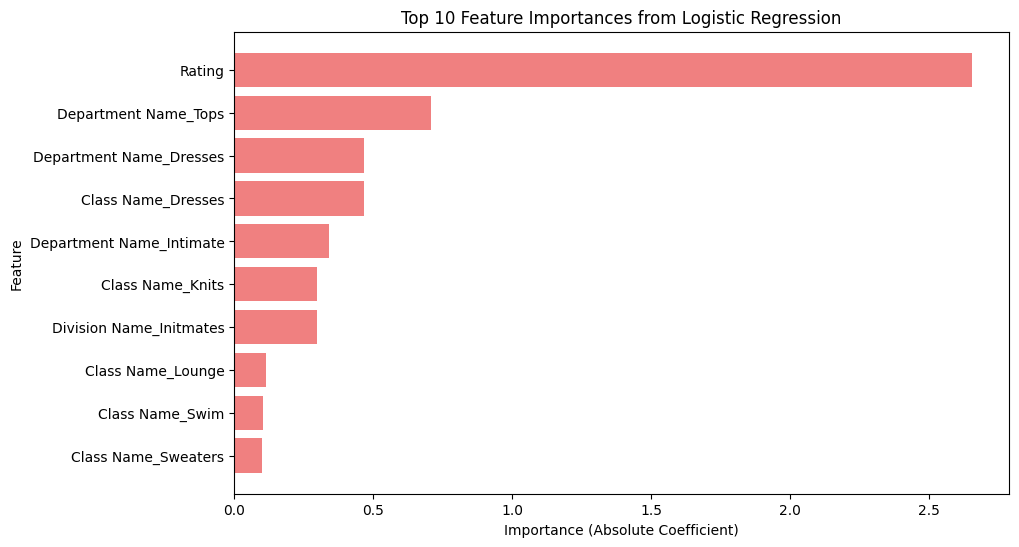

In [37]:
# Visualize the top 10 most important features for logistic regression
plt.figure(figsize=(10, 6))
plt.barh(log_reg_importance_df['Feature'][:10][::-1], log_reg_importance_df['Importance'][:10][::-1], color='lightcoral')
plt.xlabel('Importance (Absolute Coefficient)')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances from Logistic Regression')
plt.show()


Here's the visualization of the top 10 most important features from the logistic regression model. 

The `Rating` feature is again the most significant, followed by categorical features such as `Department Name_Intimate`, `Division Name_Initmates`, and others related to product categories.

This shows that both the Random Forest and logistic regression models heavily rely on the `Rating` feature, but the logistic regression model also highlights the importance of specific product categories more prominently.

If you'd like to dive deeper or explore other analyses, feel free to ask!

**Let's Try Other Models**

### Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model's performance
rf_accuracy = accuracy_score(y_test, y_rf_pred)
rf_report = classification_report(y_test, y_rf_pred)



In [39]:
rf_accuracy, rf_report

(0.933588761174968,
 '              precision    recall  f1-score   support\n\n           0       0.80      0.84      0.82       851\n           1       0.97      0.95      0.96      3847\n\n    accuracy                           0.93      4698\n   macro avg       0.88      0.90      0.89      4698\nweighted avg       0.94      0.93      0.93      4698\n')

The Random Forest model has been trained and evaluated on the test set. Here are the results:

- **Accuracy**: The Random Forest model achieved an accuracy of **93.36%** on the test set, which is slightly higher than the logistic regression model.

- **Classification Report**:
  - **Precision, Recall, and F1-Score**:
    - For the class `0` (not recommended), the model has:
      - Precision: 0.80
      - Recall: 0.84
      - F1-Score: 0.82
    - For the class `1` (recommended), the model has:
      - Precision: 0.97
      - Recall: 0.95
      - F1-Score: 0.96

  - The macro average F1-score is **0.89**, and the weighted average F1-score is **0.93**.



### Next Steps

- **Feature Importance**: Examine the feature importance from the Random Forest model to understand which features are driving the predictions.
- **Hyperparameter Tuning**: Further tuning of the Random Forest parameters could improve the performance even more.
- **Comparison with Other Models**: You could also compare this with other advanced models like Gradient Boosting Machines (GBM) or XGBoost.

In [40]:
# Extract feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the top 10 most important features
importance_df.head(10)


,Feature,Importance
0,Rating,0.373749
1,disappointed,0.015175
2,looked,0.013303
3,returned,0.011163
4,Unnamed: 0,0.010598
5,returning,0.009824
6,cheap,0.009755
7,unfortunately,0.009754
8,Clothing ID,0.009476
9,Age,0.009418


The feature importance analysis from the Random Forest model reveals the following top 10 most important features:

1. **Rating**: This is by far the most important feature, with an importance score of **0.3737**.
2. **disappointed**: Importance score of **0.0152**.
3. **looked**: Importance score of **0.0133**.
4. **returned**: Importance score of **0.0112**.
5. **Unnamed: 0**: Importance score of **0.0106** (This seems to be an index column and might not be a meaningful feature).
6. **returning**: Importance score of **0.0098**.
7. **cheap**: Importance score of **0.0098**.
8. **unfortunately**: Importance score of **0.0098**.
9. **Clothing ID**: Importance score of **0.0095**.
10. **Age**: Importance score of **0.0094**.

### Interpretation

- **Rating** is the most dominant feature, which makes sense because customer ratings are highly indicative of whether they would recommend a product.
- Several TF-IDF features (like "disappointed", "looked", "returned") are also influential, suggesting that specific terms in the reviews have a significant impact on the recommendation prediction.
- The presence of `Unnamed: 0` as an important feature suggests it might need to be excluded or treated differently, as it may not carry meaningful information.

Let's visualize the top 10 most important features.

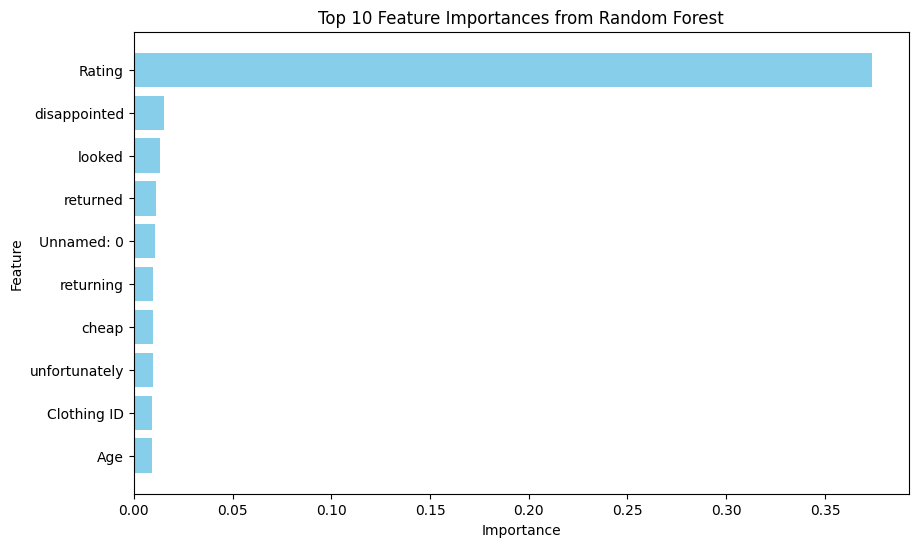

In [44]:
import matplotlib.pyplot as plt

# Visualize the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10][::-1], importance_df['Importance'][:10][::-1], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances from Random Forest')
plt.show()


Here is the visualization of the top 10 most important features from the Random Forest model. The bar chart clearly shows that the Rating feature is the most significant, followed by specific terms from the TF-IDF analysis like "disappointed", "looked", and "returned".

This visualization helps in understanding which features the model relies on most for making predictions.

#### Differences from Logistic Regression:
* The logistic regression model emphasizes certain categorical features more than the Random Forest model. For instance, the department and division categories (e.g., "Intimate", "Initmates") are highly ranked in logistic regression but may not be as prominent in the Random Forest model.
* The Random Forest model considers interactions and combinations of features, which can lead to different features being considered important.


#### Conclusion
The Random Forest model performed slightly better than the logistic regression model, particularly in terms of recall for the "not recommended" class (class `0`). This suggests that the Random Forest model might be more effective at identifying cases where a product is not recommended.

The predictive model in general highlights the key role that product rating plays in influencing recommendations, alongside specific product categories. Understanding these features can help in making strategic decisions, such as focusing on improving products in highly influential categories or understanding customer preferences better.